# Business Analysis

## User Engagement Analysis

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore', category= pd.errors.SettingWithCopyWarning)

In [3]:
import os
import sys

sys.path.append((os.path.abspath('../scripts')))

from Utils import *
from Overview_analyzer import *
from Experience_analyzer import *

DbConn = DatabaseConn()


#### Loading data from database

In [4]:
data = DbConn.load_data_from_database()

In [5]:
data_utils = DataUtils(data)
data = data_utils.data_cleaning()

>>>>>>> The data has been cleaned and outliers removed. 
The number of null values in your data are 0


##### Aggregating by user ID

In [6]:
overview_analyzer = OverviewAnalyzer(data)
user_behaviour_MSISDN = overview_analyzer.user_behaviour_Id('MSISDN/Number', data)

In [7]:
cols = ['Avg_TCP','Avg_RTT', 'Handset_type', 'Avg_Throughput', 'Handset_Count']
user_behaviour_MSISDN = user_behaviour_MSISDN[cols]
user_behaviour_MSISDN

,Avg_TCP,Avg_RTT,Handset_type,Avg_Throughput,Handset_Count
MSISDN/Number,,,,,
0.000000e+00,476.922834,34.452931,"undefined, Samsung Galaxy J5 (Sm-J530), Zte Mf...",8882364.875,103
3.362632e+10,0.328418,0.827913,Samsung Galaxy J3 (Sm-J330),121345.000,1
3.362578e+10,0.295054,0.674614,Samsung Galaxy A8 (2018),188312.875,1
3.361489e+10,3.319737,0.989685,Samsung Galaxy J5 (Sm-J530),373222.875,1
3.365973e+10,0.315197,0.951000,Huawei P20,229804.750,1
...,...,...,...,...,...
3.360102e+10,0.000000,0.053000,Apple iPhone 6 (A1586),69.000,1
3.360102e+10,8.939690,0.146000,Apple iPhone 7 Plus (A1784),19256.000,1
3.360102e+10,0.000000,0.029000,undefined,77.000,1


In [8]:
unknown_ID  = round(float((user_behaviour_MSISDN.iloc[0]['Avg_Throughput'] / user_behaviour_MSISDN['Avg_Throughput'].sum())* 100), 2 )
print(f"The percentage on the thoughput for unknown ID is {unknown_ID} %")

The percentage on the thoughput for unknown ID is 0.5 %


In [9]:
exper_analyzer = ExperAnalyzer(user_behaviour_MSISDN)
exper_analyzer.top_bottom_frequent()

>>>>>>>> TOP <<<<<<<<<<<<
                  Avg_TCP  Avg_Throughput    Avg_RTT
MSISDN/Number                                       
0.000000e+00   476.922834     8882364.875  34.452931
3.362632e+10     0.328418      121345.000   0.827913
3.362578e+10     0.295054      188312.875   0.674614
3.361489e+10     3.319737      373222.875   0.989685
3.365973e+10     0.315197      229804.750   0.951000
3.376054e+10    19.965810      134968.375   1.184641
3.367588e+10    32.641701      203594.000   1.062000
3.366716e+10     2.514197      217009.125   0.690500
3.362708e+10     0.020537       33033.000   0.785071
3.360313e+10     8.455151      144080.500   1.062728 



>>>>>>>> Bottom <<<<<<<<<<<<
                  Avg_TCP  Avg_Throughput    Avg_RTT
MSISDN/Number                                       
0.000000e+00   476.922834     8882364.875  34.452931
3.362632e+10     0.328418      121345.000   0.827913
3.362578e+10     0.295054      188312.875   0.674614
3.361489e+10     3.319737      373222.87

In [10]:
user_behaviour_MSISDN.loc[user_behaviour_MSISDN['Handset_Count'] != 1]['Handset_type']

MSISDN/Number
0.000000e+00    undefined, Samsung Galaxy J5 (Sm-J530), Zte Mf...
3.368732e+10                    Apple iPhone 6 (A1549), undefined
3.369948e+10                   Huawei B525S-23A, Huawei B528S-23A
3.368132e+10                                Huawei P10, undefined
3.360192e+10    Apple iPhone 6S (A1688), Apple iPhone 6S Plus ...
3.365077e+10     Apple iPhone Se (A1723), Apple iPhone Xr (A2105)
3.365803e+10      Apple iPhone 8 (A1905), Apple iPhone Se (A1723)
Name: Handset_type, dtype: object

**Observation**
- Only 6 people have more than one handset and these people have 2 handsets

In [11]:
# We will remove unknown users because they only account for 0.5% of average throughput
# unknows users may account for smaller percentage for the dataset but they account 8882364.875Mb of throughput
user_behaviour_MSISDN = user_behaviour_MSISDN.iloc[1:]

In [13]:
throughput_per_handset = exper_analyzer.Avg_metrics_per_handset('Avg_Throughput' ,user_behaviour_MSISDN)
throughput_per_handset

Handset_type
Huawei B528S-23A                    6.576858e+08
undefined                           6.922733e+07
Apple iPhone 6 (A1586)              5.766738e+07
Apple iPhone 6S (A1688)             5.685420e+07
Huawei E5180                        5.563862e+07
                                        ...     
Test IMEI                           2.000000e+00
Samsung Gt-S6310N                   2.000000e+00
Quectel Wireless. Quectel Ec25-E    1.000000e+00
Wct Uno                             0.000000e+00
Lg Lg-T385                          0.000000e+00
Name: Avg_Throughput, Length: 1394, dtype: float64

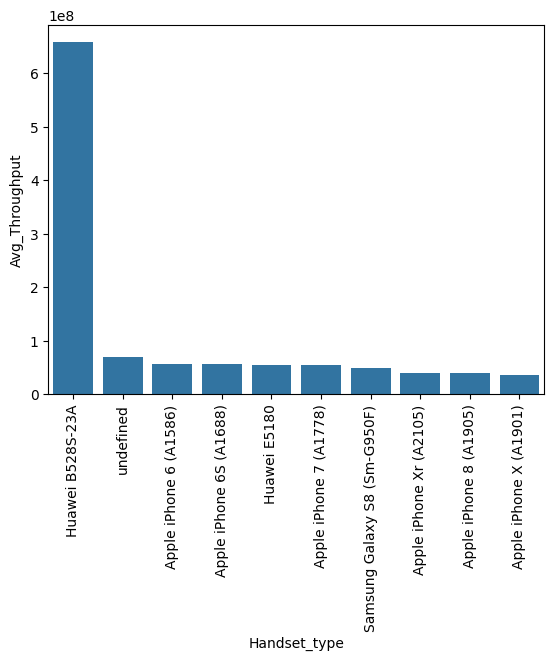

In [14]:
sns.barplot(throughput_per_handset.head(10))
plt.xticks(rotation=90);

**Observation**
- Huawei has the most amount of Throughput. Which means that a large amount of data is being transferred efficiently, which is important for supporting high-data-demand services like video streaming, file downloads, and cloud services.

In [15]:
retransmission_per_handset = exper_analyzer.Avg_metrics_per_handset('Avg_TCP' ,user_behaviour_MSISDN)
retransmission_per_handset

Handset_type
Huawei B528S-23A                       78818.700492
Huawei E5180                            8240.598699
Apple iPhone 6 (A1586)                  4375.449575
undefined                               3456.662783
Apple iPhone 7 (A1778)                  3378.665756
                                           ...     
Samsung Galaxy Note 8 (Sm-N950U)           0.000000
Zte Blade A506 Blade A506                  0.000000
Zte Axon M Zte Axon M Axon M Axon M        0.000000
Acer Liquid M220                           0.000000
A-Link Telecom I. Cubot A5                 0.000000
Name: Avg_TCP, Length: 1394, dtype: float64

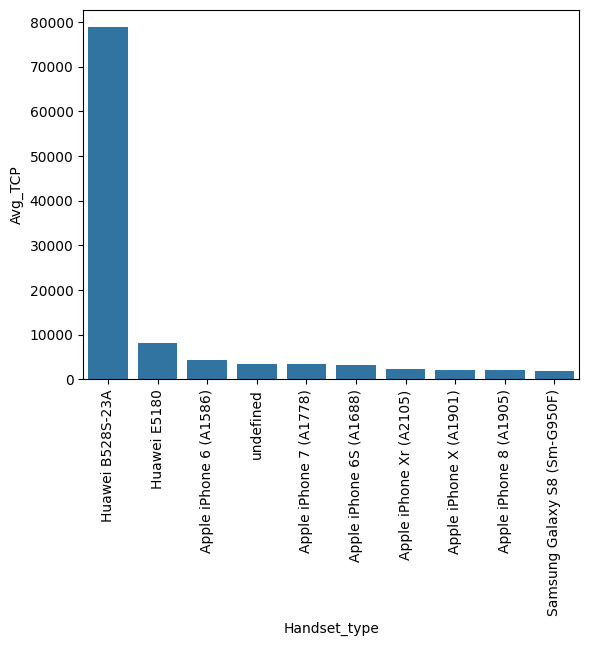

In [17]:
sns.barplot(retransmission_per_handset.head(10))
plt.xticks(rotation=90);

**Observation**
- At the same time the same model of Huawei that had high thourghoput has the higest retransmission, indicating a potential underlying network problems.

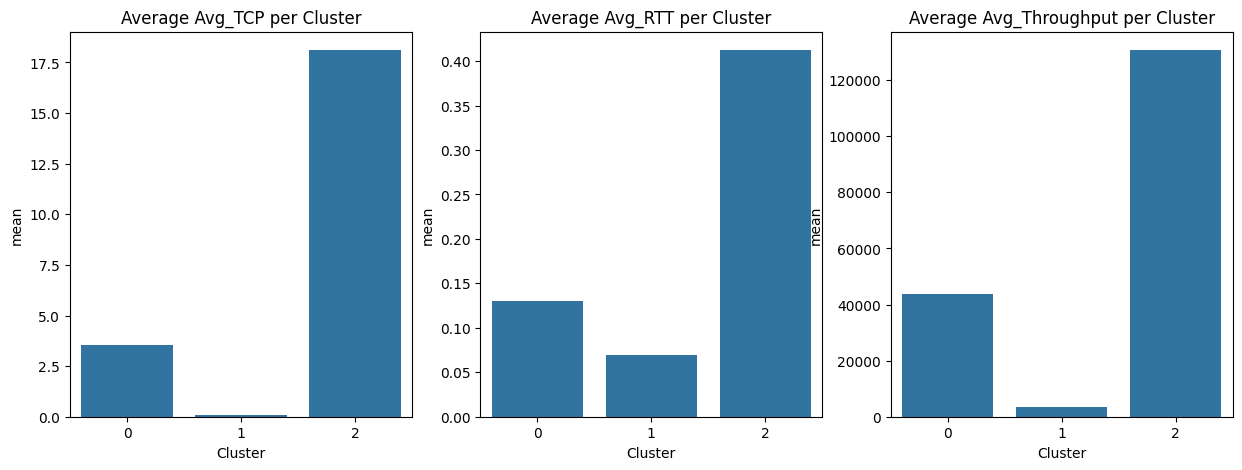

In [20]:
cols = ['Avg_TCP', 'Avg_RTT', 'Avg_Throughput']
data, cluster_stats = data_utils.cluster_analysis(cols, user_behaviour_MSISDN, n_clusters= 3)

**Observation**
- From the analysis using user experience data, the way I cleaned the data appears to have some effect. Since the meaning of NaN values in Avg_Tcp(retransmission) was unclear, I assumed they represented zero, indicating no retransmission or an efficient network. The clustering results reveal that a significant number of customers experience retransmissions, which could suggest low network performance. Cluster 1, which shows almost no retransmissions, suggests that very few customers face no retransmission issues.

- From the analysis, we can see that a large amount of data has been successfully transmitted, as indicated by the Avg_Throughput. However, due to the lack of detailed information from the data collectors and the ambiguity of the NaN values, I assumed that the throughput for these NaN values is zero. This implies that the devices are connected to the network but are neither sending nor receiving any data, as shown by Cluster 1.   


- If we assume Tellco is using Wide Area Networks (WANs), the typical RTT value ranges from 10 to 100 ms. The plots above show the RTT in seconds, with the normal range being from 0.01 to 0.1 seconds. From the clustering analysis, we can see that Clusters 0 and 1 fall within this normal range, while Cluster 2 has higher RTT values, which could indicate shortcomings in infrastructure.
